In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
df = pd.read_csv('ifood_df.csv')

In [55]:
df.head()

,Age,Income,Spending,Marital_Situation,Has_child,Educational_years,Education
0,63,58138.0,1617,Alone,No,12,Graduation
1,66,46344.0,27,Alone,Yes,12,Graduation
2,55,71613.0,776,In couple,No,12,Graduation
3,36,26646.0,53,In couple,Yes,12,Graduation
4,39,58293.0,422,In couple,Yes,21,PhD


## Data preparation

In [4]:
df = df.rename(columns={
    'Dt_Customer':'Enrollment date',
    'Recency':'Days since last purchase'})

In [5]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Days since last purchase', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [6]:
print('Number of columns :',df.shape[1])
print('Number of records :',df.shape[0])

Number of columns : 39
Number of records : 2205


In [7]:
df.isnull().any().any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Income                    2205 non-null   float64
 1   Kidhome                   2205 non-null   int64  
 2   Teenhome                  2205 non-null   int64  
 3   Days since last purchase  2205 non-null   int64  
 4   MntWines                  2205 non-null   int64  
 5   MntFruits                 2205 non-null   int64  
 6   MntMeatProducts           2205 non-null   int64  
 7   MntFishProducts           2205 non-null   int64  
 8   MntSweetProducts          2205 non-null   int64  
 9   MntGoldProds              2205 non-null   int64  
 10  NumDealsPurchases         2205 non-null   int64  
 11  NumWebPurchases           2205 non-null   int64  
 12  NumCatalogPurchases       2205 non-null   int64  
 13  NumStorePurchases         2205 non-null   int64  
 14  NumWebVi

Lets create several variables

In [9]:
df['Spending']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [10]:
df["Spending"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2200    1341
2201     444
2202    1241
2203     843
2204     172
Name: Spending, Length: 2205, dtype: int64

In [11]:
def map_marital_status(row):
    if row['marital_Divorced'] == 1 or row['marital_Single'] == 1 or row['marital_Widow'] == 1:
        return 'Alone'
    elif row['marital_Married'] == 1 or row['marital_Together'] == 1:
        return 'In couple'
    else:
        return None

In [12]:
df['Marital_Situation'] = df.apply(map_marital_status, axis=1)

In [13]:
df["Marital_Situation"]

0           Alone
1           Alone
2       In couple
3       In couple
4       In couple
          ...    
2200    In couple
2201    In couple
2202        Alone
2203    In couple
2204    In couple
Name: Marital_Situation, Length: 2205, dtype: object

In [14]:
df['Has_child'] = np.where(df.Kidhome+df.Teenhome > 0, 'Yes', 'No')

In [15]:
df["Has_child"]

0        No
1       Yes
2        No
3       Yes
4       Yes
       ... 
2200    Yes
2201    Yes
2202     No
2203    Yes
2204    Yes
Name: Has_child, Length: 2205, dtype: object

In [16]:
def map_education_level(row):
    if row['education_Basic'] == 1:
        return 5
    elif row['education_2n Cycle'] == 1:
        return 8
    elif row['education_Graduation'] == 1:
        return 12
    elif row['education_Master'] == 1:
        return 18
    elif row['education_PhD'] == 1:
        return 21
    else:
        return None
def map_education_type(row):
    if row['education_Basic'] == 1:
        return 'Basic'
    elif row['education_2n Cycle'] == 1:
        return '2n Cycle'
    elif row['education_Graduation'] == 1:
        return 'Graduation'
    elif row['education_Master'] == 1:
        return 'Master'
    elif row['education_PhD'] == 1:
        return 'PhD'
    else:
        return None 

In [17]:
df['Educational_years'] = df.apply(map_education_level, axis=1)

In [18]:
df['Education'] = df.apply(map_education_type, axis=1)

In [19]:
df['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2200    Graduation
2201           PhD
2202    Graduation
2203        Master
2204           PhD
Name: Education, Length: 2205, dtype: object

In [20]:
df=df[['Age','Income','Spending','Marital_Situation','Has_child','Educational_years',"Education"]]

## Exploratory Data Analysis

In [21]:
df.head()

,Age,Income,Spending,Marital_Situation,Has_child,Educational_years,Education
0,63,58138.0,1617,Alone,No,12,Graduation
1,66,46344.0,27,Alone,Yes,12,Graduation
2,55,71613.0,776,In couple,No,12,Graduation
3,36,26646.0,53,In couple,Yes,12,Graduation
4,39,58293.0,422,In couple,Yes,21,PhD


In [22]:
df.describe()

,Age,Income,Spending,Educational_years
count,2205.000000,2205.000000,2205.000000,2205.000000
mean,51.095692,51622.094785,606.821769,14.402721
std,11.705801,20713.063826,601.675284,4.505712
min,24.000000,1730.000000,5.000000,5.000000
25%,43.000000,35196.000000,69.000000,12.000000
50%,50.000000,51287.000000,397.000000,12.000000
75%,61.000000,68281.000000,1047.000000,18.000000
max,80.000000,113734.000000,2525.000000,21.000000


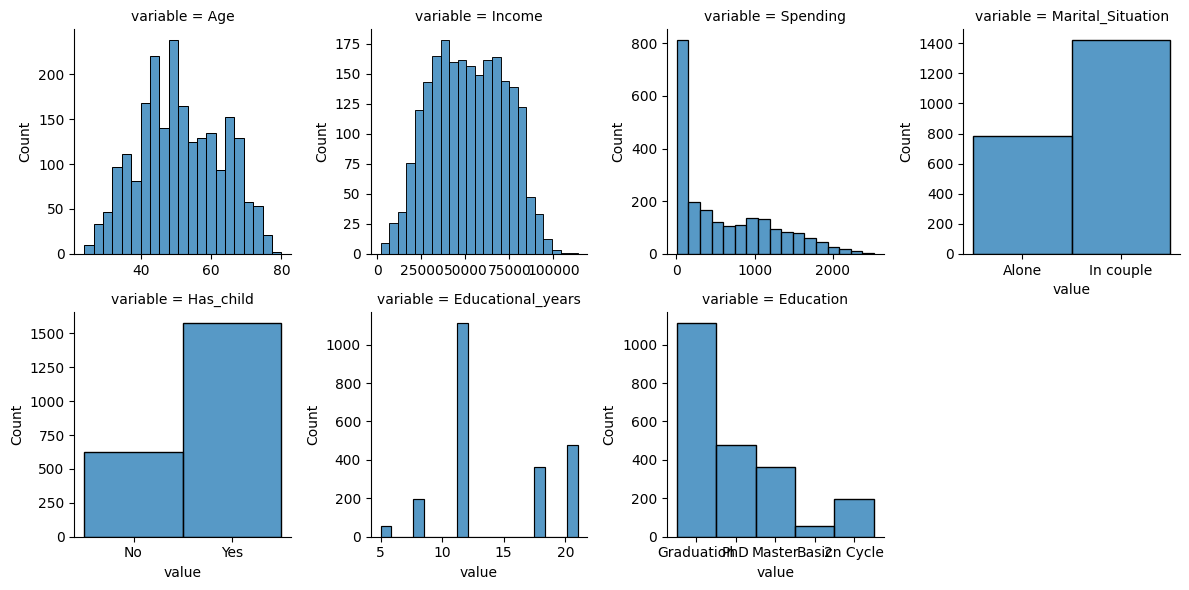

In [23]:
nd = pd.melt(df, value_vars =df )
n1 = sns.FacetGrid(nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.histplot, 'value')
n1

In [24]:
df[["Age","Income","Spending","Educational_years"]]

,Age,Income,Spending,Educational_years
0,63,58138.0,1617,12
1,66,46344.0,27,12
2,55,71613.0,776,12
3,36,26646.0,53,12
4,39,58293.0,422,21
...,...,...,...,...
2200,53,61223.0,1341,12
2201,74,64014.0,444,21
2202,39,56981.0,1241,12
2203,64,69245.0,843,18


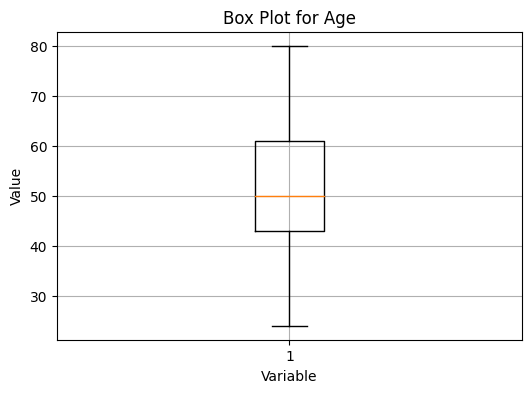

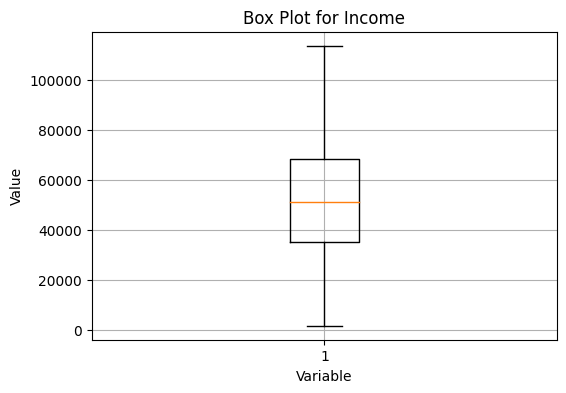

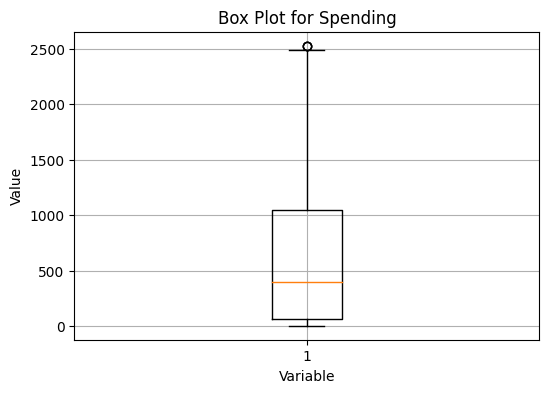

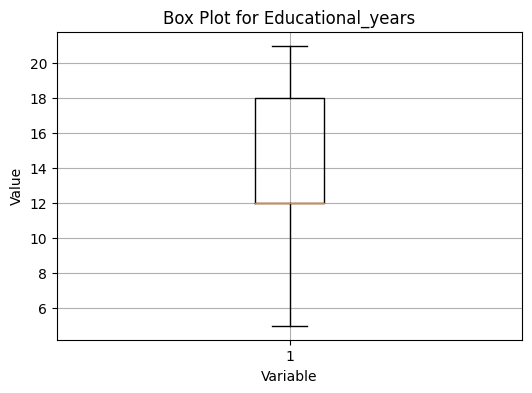

In [25]:
selected_columns = ["Age", "Income", "Spending", "Educational_years"]

# Строим box plots для каждого выбранного столбца на отдельном графике
for column in selected_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column])
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Value')
    plt.xlabel('Variable')
    plt.grid(True)
    plt.show()

<Axes: >

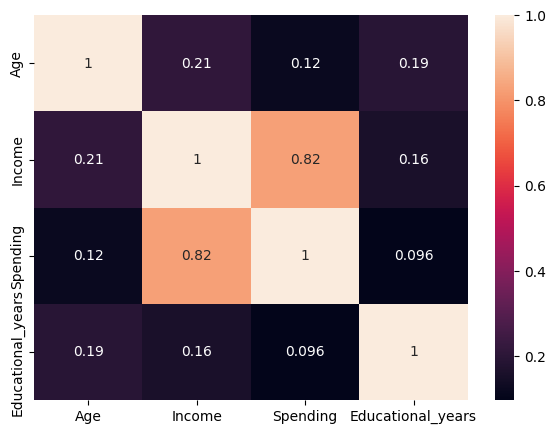

In [343]:
plt.figure(figsize=(7,5))
sns.heatmap(df[["Age","Income","Spending","Educational_years"]].corr(),annot=True)

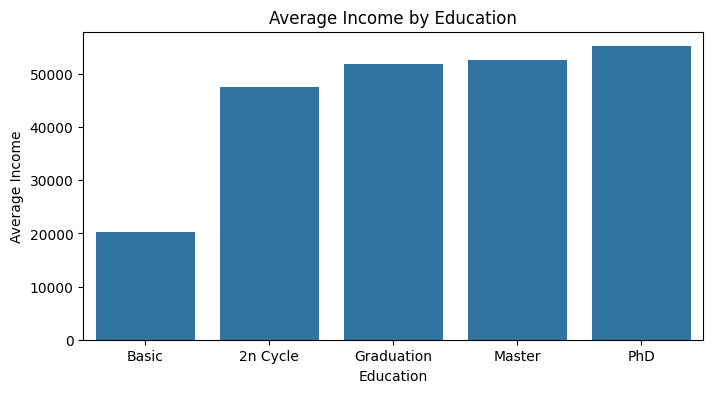

In [28]:
df['Education'] = pd.Categorical(df['Education'], categories=["Basic","2n Cycle","Graduation","Master","PhD"], ordered=True)

#Группируем данные по типу образования и вычисляем средний доход
grouped_df = df.groupby('Education')['Income'].mean().reset_index()

#Построение гистограммы среднего дохода по типу образования с помощью Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(data=grouped_df, x='Education', y='Income', order=["Basic","2n Cycle","Graduation","Master","PhD"])
plt.xlabel('Education')
plt.ylabel('Average Income')
plt.title('Average Income by Education')
plt.show()

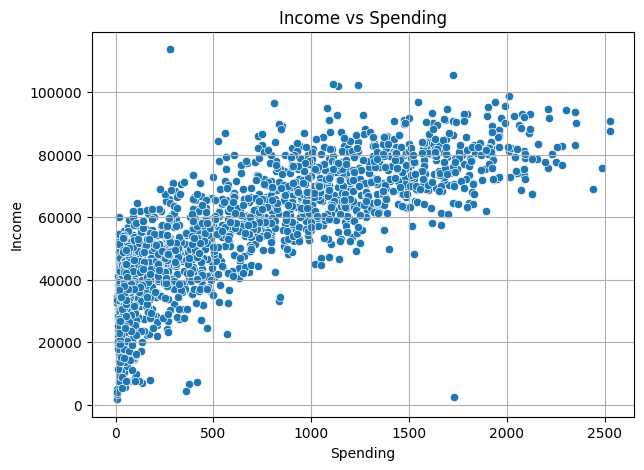

In [29]:
# Построение scatter plot с помощью Seaborn
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Spending', y='Income')
plt.xlabel('Spending')
plt.ylabel('Income')
plt.title('Income vs Spending')
plt.grid(True)
plt.show()

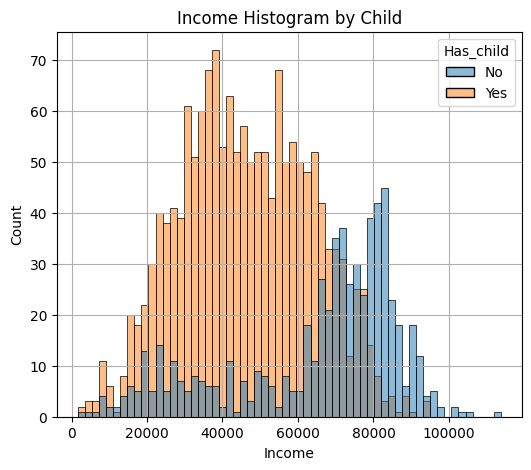

In [30]:
plt.figure(figsize=(6, 5))
sns.histplot(data=df, x='Income', hue='Has_child', bins=60)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Histogram by Child')
plt.grid(True)
plt.show()

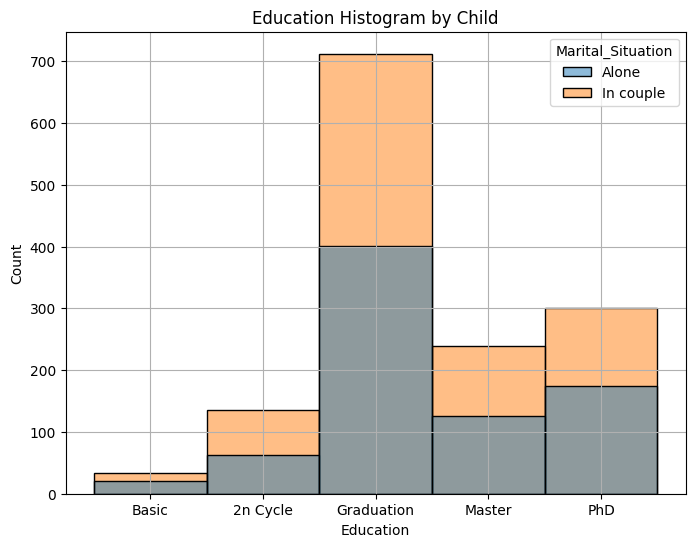

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Education', hue='Marital_Situation', bins=60)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Histogram by Child')
plt.grid(True)
plt.show()

## Hypothesis Testing

### 1) Корреляция между годовым доходом и суммой расходов статистически значима?

In [36]:
import statsmodels.api as sm

QQ-plots

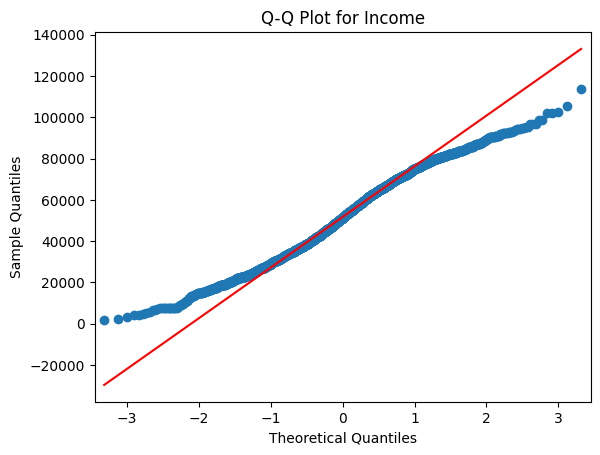

In [37]:
sm.qqplot(df["Income"], line ='q')
plt.title('Q-Q Plot for Income')
plt.show()

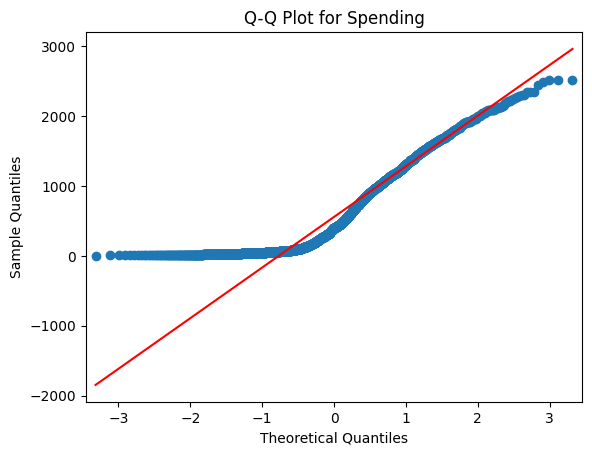

In [38]:
sm.qqplot(df["Spending"], line ='q')
plt.title('Q-Q Plot for Spending')
plt.show()

Shapiro test

In [39]:
from scipy.stats import shapiro
X=['Age','Income','Spending','Educational_years']

column_dict= {elem : pd.DataFrame() for elem in X}

def shapiro_test(data):
    stat, p = shapiro(data)
    print('%s : Statistics=%.3f, p=%.3f' % (column,stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (We fail to reject H0)')
    else:
        print('Sample does not look Gaussian (We reject H0)')

for column in X:
    column_dict[column] = df[column]
    shapiro_test(column_dict[column])

Age : Statistics=0.983, p=0.000
Sample does not look Gaussian (We reject H0)
Income : Statistics=0.984, p=0.000
Sample does not look Gaussian (We reject H0)
Spending : Statistics=0.866, p=0.000
Sample does not look Gaussian (We reject H0)
Educational_years : Statistics=0.832, p=0.000
Sample does not look Gaussian (We reject H0)


Spearman Rank Correlation test

H0: нет монотонной связи между доходом и суммой расходов

H1: есть монотонная связь между доходом и суммой расходов

Уровень значимости используется как 5%.

In [40]:
from scipy.stats import spearmanr
cor, pvalue = spearmanr(df[['Spending']], df[['Income']])
print("Spearman correlation test : correlation coefficient : %.4f, pval: %.4f" % (cor, pvalue))

Spearman correlation test : correlation coefficient : 0.8604, pval: 0.0000


Так как p-value < 0.05 можно отвергнуть нулевую гипотезу. Коэффициент 
корреляции 0.86 говорит о довольно сильной положительной корреляции

### 2) Отличается ли статистически средняя заработная плата людей с уровнем образования Master от людей с уровнем образования PhD?

H0: средние ранги 2 групп равны

H1: средние ранги 2 групп не равны

U test

In [43]:
Phd_graduate=df[df['Education']=='PhD']
Master_graduate=df[df['Education']=='Master']

stat, p = shapiro(Phd_graduate.Income)
stat1, p1 = shapiro(Master_graduate.Income)
print('Statistics=%.3f, p=%.3f' % (stat, p))
print('Statistics=%.3f, p=%.3f' % (stat1, p1))

Statistics=0.991, p=0.005
Statistics=0.988, p=0.003


In [44]:
from scipy.stats import mannwhitneyu
print('PhD: median = %.0f stdv = %.1f' % (np.median(Phd_graduate.Income), np.std(Phd_graduate.Income)))
print('Master: median = %.0f stdv = %.1f' % (np.median(Master_graduate.Income), np.std(Master_graduate.Income)))

stat, p =  mannwhitneyu(Phd_graduate.Income, Master_graduate.Income)
print("statistics=",stat,"p-value",p)


PhD: median = 55005 stdv = 18343.9
Master: median = 50920 stdv = 19392.6
statistics= 93667.5 p-value 0.04350343114442508


p-value < 0.05, отвергаем нулевую гипотезу.


### 3) Есть ли связь между уровнем образования и семейным положением?

 Chi-square test for independance

H0: уровень образования и семейное положение независимы 

H1: уровень образования и семейное положение не независимы

In [47]:
crosstab = pd.crosstab(df["Education"], df["Marital_Situation"])
crosstab

Marital_Situation,Alone,In couple
Education,,
Basic,20,34
2n Cycle,62,136
Graduation,401,712
Master,125,239
PhD,175,301


In [48]:
from scipy.stats import chi2_contingency, chi2

stat, p, dof, expected = chi2_contingency(crosstab)
print('Degress of freedom = %d' % dof)

Degress of freedom = 4


In [49]:
print(expected)

[[ 19.1755102   34.8244898 ]
 [ 70.31020408 127.68979592]
 [395.22857143 717.77142857]
 [129.25714286 234.74285714]
 [169.02857143 306.97142857]]


In [50]:
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=9.488, stat=2.253


In [52]:
print("statistics=",round(stat,3), "p-value=", round(p,3))

statistics= 2.253 p-value= 0.689


В результате получили p-value > 0.05

Нет оснований отклонить нулевую гипотезу